D=2, average distance=0.519878
D=8, average distance=1.12114
D=32, average distance=2.30087
D=128, average distance=4.60889
D=512, average distance=9.24036


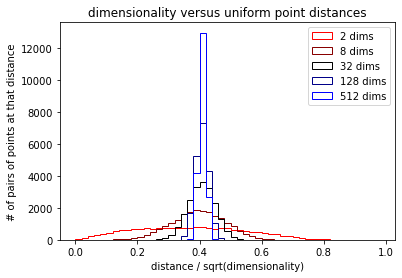

In [1]:
from math import *
import random
from numpy import *
import matplotlib.pyplot as plt

waitForEnter=False

def generateUniformExample(numDim):
    return [random.random() for d in range(numDim)]

def generateUniformDataset(numDim, numEx):
    return [generateUniformExample(numDim) for n in range(numEx)]

def computeExampleDistance(x1, x2):
    dist = 0.0
    for d in range(len(x1)):
        dist += (x1[d] - x2[d]) * (x1[d] - x2[d])
    return sqrt(dist)

def computeDistances(data):
    N = len(data)
    D = len(data[0])
    dist = []
    for n in range(N):
        for m in range(n):
            dist.append( computeExampleDistance(data[n],data[m])  / sqrt(D))
    return dist

N    = 200                   # number of examples
Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 1, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus uniform point distances')

for i,d in enumerate(Dims):
    distances = computeDistances(generateUniformDataset(d, N))
    print ("D=%d, average distance=%g" % (d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    if waitForEnter:
        plt.legend(['%d dims' % d for d in Dims])
        plt.show(False)
        x = raw_input('Press enter to continue...')


plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig.pdf')
plt.show()